# T 102: Data Exploration, Analysis and Insights

This notebook serves as the solution of second part of **Task 1: Data Preparation and Customer Analytics** of **Quantium Data Analytics Virtual Experience Program.**

In the last notebook `T 101: Data Cleaning and Merging`, we cleaned the data and merged transaction and customer segment dataframes into single a single dataframe.

In this notebook, we will perform next step
- **Exploring** features of the dataframe
- **Analysing** customer segments with respect to number of customers, sales, quantity purchased, etc.
- Finding **Insights** from the dataset to help the Category Manager with recommendations

**The goal of this notebook is to find which customer segments to target and how to target them.** The whole process will be performed in 3 phases:
- **Phase 1:** In the first phase, we will explore the various features of the dataframe and check if all features are assigned correct data types or not. Then we will look for missing values and outliers, (if present) then take adequate steps to desolve them.


- **Phase 2:** Once we complete the first phase, we will then start the second phase. In this phase, we will find the customer segments which we should target in order to increase the sales and profit for us. Basically we will be targeting top 3 segments which contribute to the sales most and the reason behind that.


- **Phase 3:** Once we figured out our top 3 segments, we will enter the third phase. In this phase, we will derive interesting insights for those segments and find out how to target them. Basically, we will find the most eligible product which could be used to target them in order to increase the sales. 

# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
sns.set(font_scale=1)

import warnings
warnings.filterwarnings("ignore")

# Loading Dataset

In [2]:
#loading dataframe
df = pd.read_csv("C:/Users/amitm/Jupyter Notebools/Quantium/Task 1/QVI_merged_data.csv")

In [3]:
#display first 5 rows of the dataframe
df.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PROD_WT,BRAND_NAME,Flavour,LIFESTAGE,PREMIUM_CUSTOMER
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,175,Naturals,Sea Salt,YOUNG SINGLES/COUPLES,Premium
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,175,Corn Chips,Nacho Cheese,MIDAGE SINGLES/COUPLES,Budget
2,2018-11-10,1,1307,346,96,WW Original Stacked Chips 160g,2,3.8,160,Woolworths,Original Stacked,MIDAGE SINGLES/COUPLES,Budget
3,2019-03-09,1,1307,347,54,CCs Original 175g,1,2.1,175,Corn Chips,Original,MIDAGE SINGLES/COUPLES,Budget
4,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,170,Smiths,Chicken,MIDAGE SINGLES/COUPLES,Budget


> # Phase 1: Exploring Dataset

In [4]:
#columns of the dataframe
df.columns

Index(['DATE', 'STORE_NBR', 'LYLTY_CARD_NBR', 'TXN_ID', 'PROD_NBR',
       'PROD_NAME', 'PROD_QTY', 'TOT_SALES', 'PROD_WT', 'BRAND_NAME',
       'Flavour', 'LIFESTAGE', 'PREMIUM_CUSTOMER'],
      dtype='object')

In [5]:
#checking data types of features
df.dtypes

DATE                 object
STORE_NBR             int64
LYLTY_CARD_NBR        int64
TXN_ID                int64
PROD_NBR              int64
PROD_NAME            object
PROD_QTY              int64
TOT_SALES           float64
PROD_WT               int64
BRAND_NAME           object
Flavour              object
LIFESTAGE            object
PREMIUM_CUSTOMER     object
dtype: object

**Changing data type of DATE to date type**

In [6]:
df["DATE"] = pd.to_datetime(df["DATE"])

In [7]:
#checking data types of features again
df.dtypes

DATE                datetime64[ns]
STORE_NBR                    int64
LYLTY_CARD_NBR               int64
TXN_ID                       int64
PROD_NBR                     int64
PROD_NAME                   object
PROD_QTY                     int64
TOT_SALES                  float64
PROD_WT                      int64
BRAND_NAME                  object
Flavour                     object
LIFESTAGE                   object
PREMIUM_CUSTOMER            object
dtype: object

# Checking for Missing Values

In [8]:
#checking for missing values
df.isnull().sum()

DATE                0
STORE_NBR           0
LYLTY_CARD_NBR      0
TXN_ID              0
PROD_NBR            0
PROD_NAME           0
PROD_QTY            0
TOT_SALES           0
PROD_WT             0
BRAND_NAME          0
Flavour             0
LIFESTAGE           0
PREMIUM_CUSTOMER    0
dtype: int64

#### *No Missing values in the dataset, that's GREAT :)*

# Checking Description

In [9]:
df[["PROD_WT","PROD_QTY","TOT_SALES"]].describe(percentiles=[.01,.10,.25,.50,.75,.90,.99])

,PROD_WT,PROD_QTY,TOT_SALES
count,264836.000000,264836.000000,264836.000000
mean,182.427004,1.907309,7.304200
std,64.327196,0.643654,3.083226
min,70.000000,1.000000,1.500000
1%,90.000000,1.000000,2.100000
10%,110.000000,1.000000,3.800000
25%,150.000000,2.000000,5.400000
50%,170.000000,2.000000,7.400000
75%,175.000000,2.000000,9.200000
90%,300.000000,2.000000,10.800000


### Observations:

- PROD_WT i.e. packet size seem to be fine, no signs of potential outliers.
- PROD_QTY i.e. product quanitity seems to have some extremely high values. There are order(s) of 200 packets when 99% of orders are of 2 packets only.
- Similarly in total sales also, there are some extremely high values, this will be because of presence of outliers in quantity.

***Let's examine the product quanity column***

In [10]:
#count of entries for unique product quantities
df["PROD_QTY"].value_counts()

2      236039
1       27518
5         450
3         430
4         397
200         2
Name: PROD_QTY, dtype: int64

In [11]:
df[df["PROD_QTY"]==200]

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PROD_WT,BRAND_NAME,Flavour,LIFESTAGE,PREMIUM_CUSTOMER
752,2018-08-19,226,226000,226201,4,Dorito Corn Chp Supreme 380g,200,650.0,380,Doritos,Supreme,OLDER FAMILIES,Premium
753,2019-05-20,226,226000,226210,4,Dorito Corn Chp Supreme 380g,200,650.0,380,Doritos,Supreme,OLDER FAMILIES,Premium


#### Only two transactions happened for the purchase of 200 packets each by the same customer.

#### *Let's examine other transactions done by this customer.*

In [12]:
df[df["LYLTY_CARD_NBR"]==226000]

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PROD_WT,BRAND_NAME,Flavour,LIFESTAGE,PREMIUM_CUSTOMER
752,2018-08-19,226,226000,226201,4,Dorito Corn Chp Supreme 380g,200,650.0,380,Doritos,Supreme,OLDER FAMILIES,Premium
753,2019-05-20,226,226000,226210,4,Dorito Corn Chp Supreme 380g,200,650.0,380,Doritos,Supreme,OLDER FAMILIES,Premium


**Only 2 transactions made by this customer with us. Either the values captured are incorrectly or the customer maybe purchasing these many products for re-sale.**

***We will drop transactions done by this customer from the dataset.***

In [13]:
print(f"Shape of dataset BEFORE droping outliers: {df.shape}")

Shape of dataset BEFORE droping outliers: (264836, 13)


In [14]:
#dropping the customer from the dataframe
df.drop(index=[752,753],axis=0,inplace=True)

print(f"Shape of dataset AFTER droping outliers: {df.shape}")

Shape of dataset AFTER droping outliers: (264834, 13)


In [15]:
#reseting index afer droping two rows
df.reset_index(inplace=True,drop=True)

In [16]:
#checking the descrption of the dataframe again
df[["PROD_WT","PROD_QTY","TOT_SALES"]].describe(percentiles=[.01,.10,.25,.50,.75,.90,.99])

,PROD_WT,PROD_QTY,TOT_SALES
count,264834.000000,264834.000000,264834.000000
mean,182.425512,1.905813,7.299346
std,64.325148,0.343436,2.527241
min,70.000000,1.000000,1.500000
1%,90.000000,1.000000,2.100000
10%,110.000000,1.000000,3.800000
25%,150.000000,2.000000,5.400000
50%,170.000000,2.000000,7.400000
75%,175.000000,2.000000,9.200000
90%,300.000000,2.000000,10.800000


#### *Outliers dropped successfully and data seem to be fine now*

### Let's explore the Date

In [17]:
# checking min, max and count of unique dates
print("Date (Minimum): {}".format(df["DATE"].min()))
print("Date (Maximum): {}".format(df["DATE"].max()))
print("Date (Count): {}".format(df["DATE"].nunique()))

Date (Minimum): 2018-07-01 00:00:00
Date (Maximum): 2019-06-30 00:00:00
Date (Count): 364


### Observations:

- Date ranges from 1st July 2018 to 30th June 2019

- There are only 364 unique dates, however in a year there are 365 days. There must be a day when no transaction happened.

***We will find which date is missing in the time range and find the reason behind them.***

In [18]:
#creating an array with all dates from 1st July 2018 to 30th June 2019
base = df["DATE"].min()
all_dates = [base + datetime.timedelta(days=x) for x in range(0, 365)]

In [19]:
#Finding the missing date from the dataframe

for x in all_dates:
    if x not in df["DATE"].dt.date.unique():
        print(x)

2018-12-25 00:00:00


In [20]:
#checking the data for missing date from the dataframe 
df[df["DATE"] == pd.to_datetime("2018-12-25")]

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PROD_WT,BRAND_NAME,Flavour,LIFESTAGE,PREMIUM_CUSTOMER


#### It is clear that there is no transaction made on 25th December 2018

In [21]:
#let's group the data by data by dates and visulaise it
#maybe from there we could make any inference

Sales = df.groupby("DATE").agg({"TOT_SALES":"sum"}).reset_index()

Sales.head()

,DATE,TOT_SALES
0,2018-07-01,5372.2
1,2018-07-02,5315.4
2,2018-07-03,5321.8
3,2018-07-04,5309.9
4,2018-07-05,5080.9


In [22]:
#data frame with all dates
d = pd.DataFrame(all_dates,columns=["DATE"])

In [23]:
#merging both dataframes to include 25th December 2018 (missing date)
Sales = d.merge(Sales,on="DATE",how="left")

#### Let's visualize some numerical features over the time period

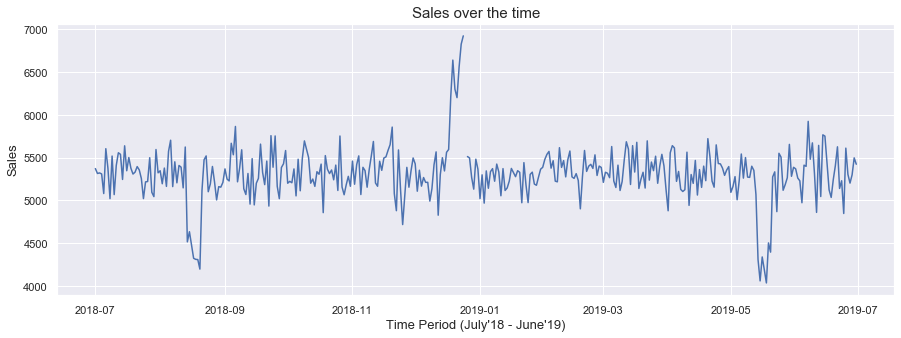

In [24]:
plt.figure(figsize=(15,5))

plt.plot(Sales["DATE"],Sales["TOT_SALES"])

plt.xlabel("Time Period (July'18 - June'19)",size=13)
plt.ylabel("Sales",size=13)
plt.title("Sales over the time",size=15)

plt.show()

**We can see a break in the graph in month of December, let's zoom in**

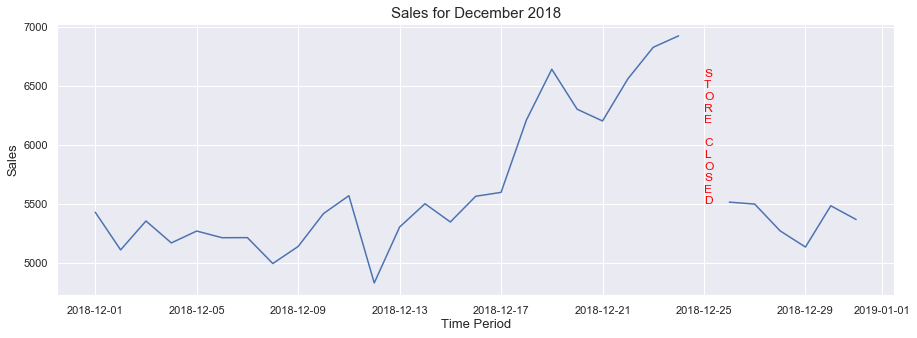

In [25]:
plt.figure(figsize=(15,5))

plt.plot(Sales[Sales["DATE"].dt.month == 12]["DATE"],Sales[Sales["DATE"].dt.month == 12]["TOT_SALES"],label="Total Sales")
plt.text(x=pd.to_datetime("2018-12-25"),y=5500,s="\n".join("STORE CLOSED"),color="red")

plt.xlabel("Time Period",size=13)
plt.ylabel("Sales",size=13)
plt.title("Sales for December 2018",size=15)

plt.show()

### Observations:
- It is clear that break is on 25th December, as there was no transaction made.
- Sales seem to be increased in that week (Christmas Week)

***Possible reason for no sales on 25th December is because of Christmas Day holiday and stores must be closed. Also, sales was increased in the week because people tends to buy more to celebrate.***

### Let's explore Packet Size

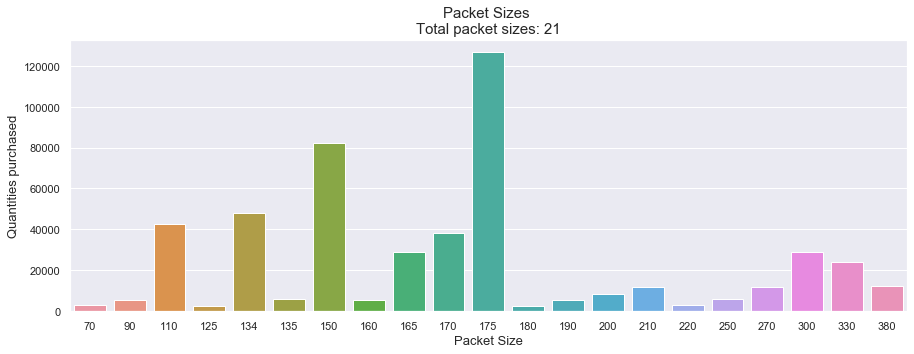

In [26]:
plt.figure(figsize=(15,5))

data = df.groupby("PROD_WT")["PROD_QTY"].sum().reset_index()
sns.barplot(data=data, x="PROD_WT", y="PROD_QTY")
plt.xlabel("Packet Size",size=13)
plt.ylabel("Quantities purchased",size=13)
plt.title("Packet Sizes \nTotal packet sizes: {}".format(data["PROD_WT"].nunique()),size=15)

plt.show()

### Observations:
- There are 20 packet sizes ranging from 70 to 380 grams.
- Packet size of 175 grams is popular among customers, followed by 150 grams pack.
- Reason for these many packet sizes could be bacause different brands have different packet sizes and startegies

### Let's explore Brand Names

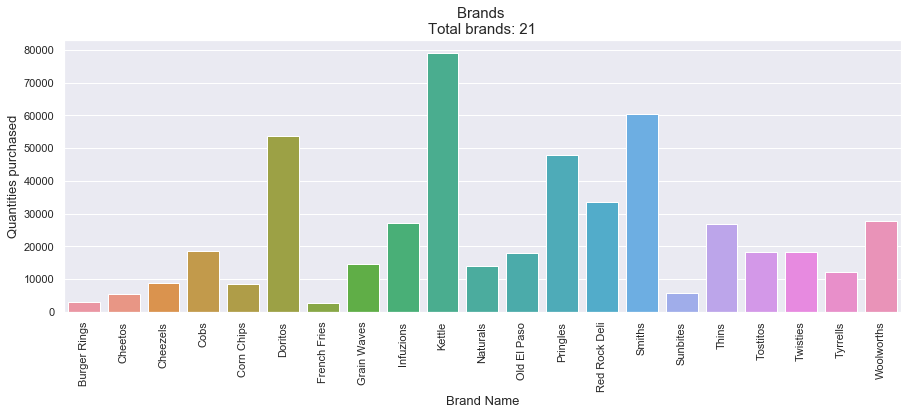

In [27]:
plt.figure(figsize=(15,5))

data = df.groupby("BRAND_NAME")["PROD_QTY"].sum().reset_index()
sns.barplot(data=data, x="BRAND_NAME", y="PROD_QTY")

plt.xlabel("Brand Name",size=13)
plt.ylabel("Quantities purchased",size=13)
plt.xticks(rotation=90)
plt.title("Brands \nTotal brands: {}".format(data["BRAND_NAME"].nunique()),size=15)

plt.show()

### Observations:

- There are 20 brands in the dataset.
- Kettle brand made most transactions as compared other brands and Burger King least.

### Let's explore Flavours

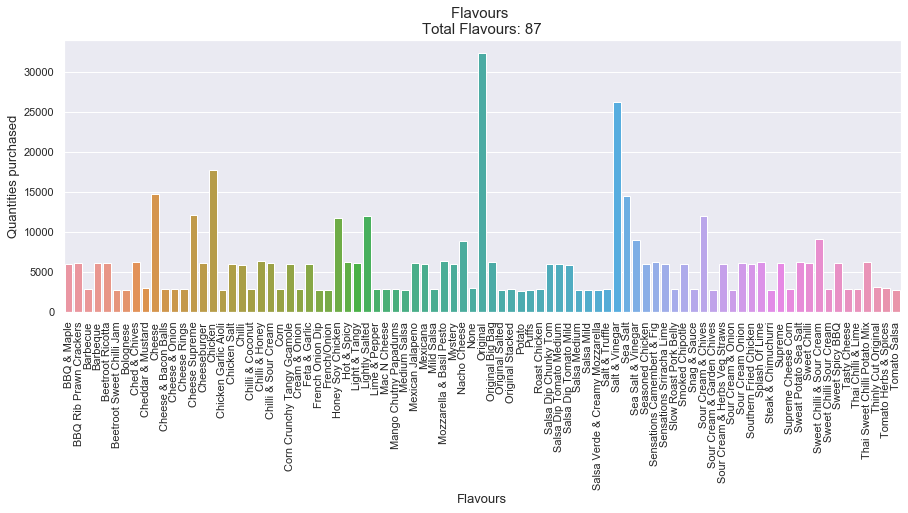

In [28]:
plt.figure(figsize=(15,5))

data = df.groupby("Flavour")["PROD_QTY"].sum().reset_index()
sns.barplot(data=data, x="Flavour", y="PROD_QTY")

plt.xlabel("Flavours",size=13)
plt.ylabel("Quantities purchased",size=13)
plt.xticks(rotation=90)
plt.title("Flavours \nTotal Flavours: {}".format(data["Flavour"].nunique()),size=15)

plt.show()

### Observations:

- There are total 78 flavours
- Some falvours are popular among customers, like Original flavour of some brands foloowed by Salt & Vinegar flavour

### Let's explore Premium Customer Segment

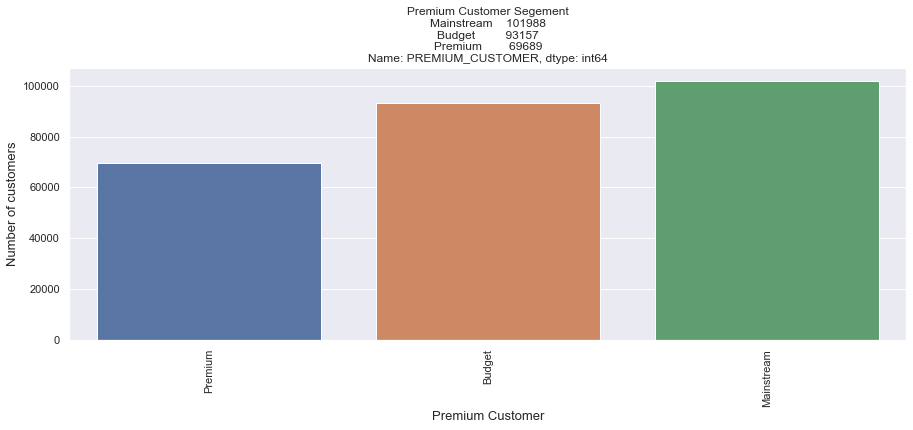

In [29]:
plt.figure(figsize=(15,5))
sns.countplot(df["PREMIUM_CUSTOMER"])

plt.xlabel("Premium Customer",size=13)
plt.ylabel("Number of customers",size=13)
plt.xticks(rotation=90)
plt.title("Premium Customer Segement\n{}".format(df["PREMIUM_CUSTOMER"].value_counts()),size=12)
          
plt.show()

### Observations:
- There 3 types of Premium customer segments
- Most transactions are done by Mainstream customers and least by Premium customers

### Let's explore Lifestage Customer Segment

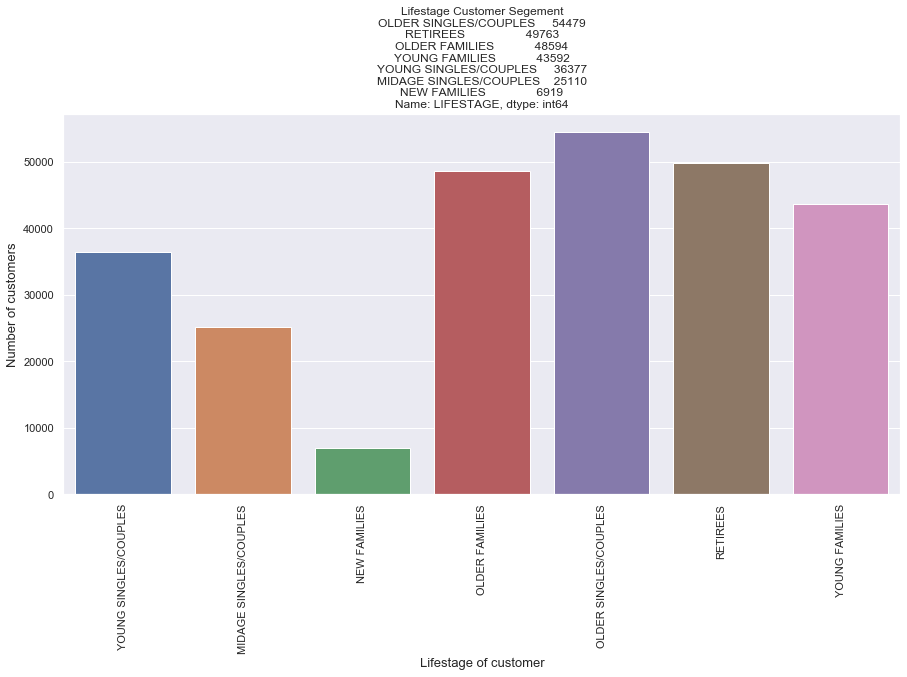

In [30]:
plt.figure(figsize=(15,7))
sns.countplot(df["LIFESTAGE"])

plt.xlabel("Lifestage of customer",size=13)
plt.ylabel("Number of customers",size=13)
plt.xticks(rotation=90)
plt.title("Lifestage Customer Segement\n{}".format(df["LIFESTAGE"].value_counts()),size=12)

plt.show()

### Observations:
- There 7 types of Lifestage customer segments
- Most transactions are done by Older Singles/ Couples followed by Retirees
- New familes have done least transactions among all segments

> # Phase 2: Analysis and Finding Top 3 Segments

### 1. Who spends the most on chips (total sales), describing customers by lifestage and how premium their general purchasing behaviour is?

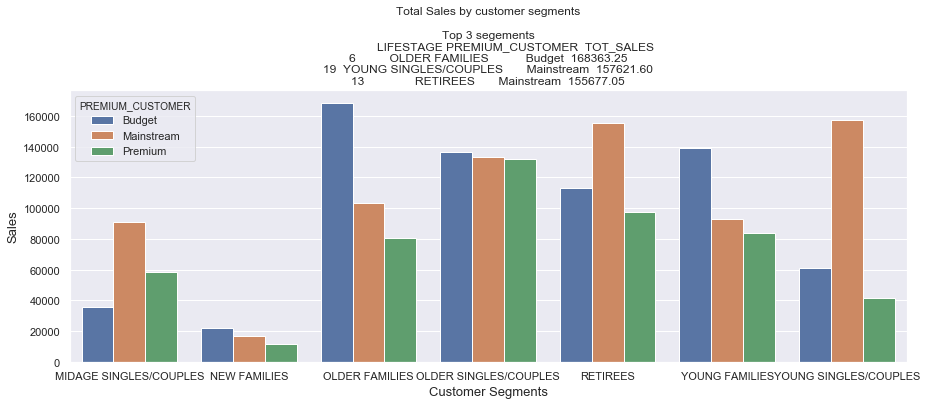

In [31]:
plt.figure(figsize=(15,5))

segements = df.groupby(["LIFESTAGE","PREMIUM_CUSTOMER"])[["TOT_SALES"]].sum().reset_index()
top3 = segements.sort_values(by="TOT_SALES",ascending=False).head(3)
sns.barplot(data=segements,x="LIFESTAGE",y="TOT_SALES",hue="PREMIUM_CUSTOMER")

plt.xlabel("Customer Segments",size=13)
plt.ylabel("Sales",size=13)
plt.title("Total Sales by customer segments\n\nTop 3 segements\n{}".format(str(top3)),size=12)

plt.show()

### Insights:

- **Top 3** customer segments with respect to total sales are:
    1. (Budget) Older Families
    2. (Mainstream) Young Singles/Couples
    3. (Mainstream) Retirees
    
    
- New Familes contributes **least** to total sales

### 2. How many customers are in each segment?

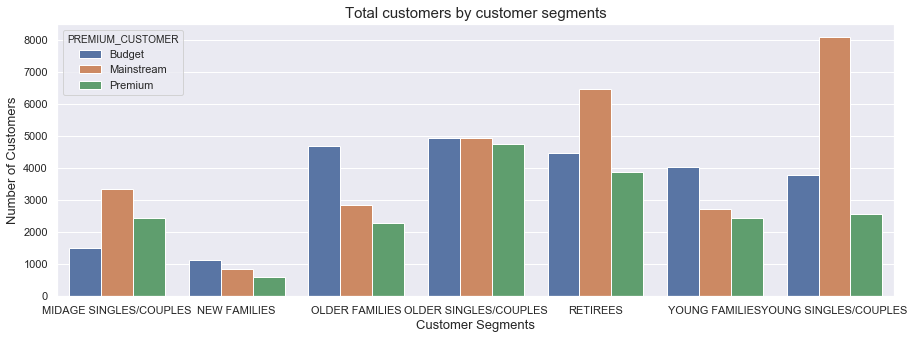

,LIFESTAGE,PREMIUM_CUSTOMER,LYLTY_CARD_NBR
0,MIDAGE SINGLES/COUPLES,Budget,1504
1,MIDAGE SINGLES/COUPLES,Mainstream,3340
2,MIDAGE SINGLES/COUPLES,Premium,2431
3,NEW FAMILIES,Budget,1112
4,NEW FAMILIES,Mainstream,849
5,NEW FAMILIES,Premium,588
6,OLDER FAMILIES,Budget,4675
7,OLDER FAMILIES,Mainstream,2831
8,OLDER FAMILIES,Premium,2273
9,OLDER SINGLES/COUPLES,Budget,4929


In [32]:
plt.figure(figsize=(15,5))

segements = df.groupby(["LIFESTAGE","PREMIUM_CUSTOMER"]).agg({"LYLTY_CARD_NBR":pd.Series.nunique}).reset_index()
sns.barplot(data=segements,x="LIFESTAGE",y="LYLTY_CARD_NBR",hue="PREMIUM_CUSTOMER")

plt.xlabel("Customer Segments",size=13)
plt.ylabel("Number of Customers",size=13)
plt.title("Total customers by customer segments",size=15)

plt.show()

segements

### Insights:

- **Top 3** customer segments with respect to number of customers are:
    1. (Mainstream) Young Singles/Couples
    2. (Mainstream) Retirees
    3. (Mainstream) Older Singles/Couples
    
    
- Number of customers in New Familes segment are **least**

### 3. How many chips are bought per customer by segment?

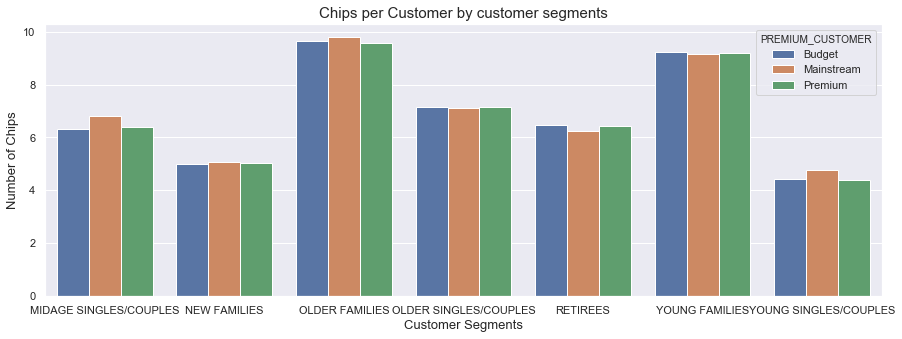

,LIFESTAGE,PREMIUM_CUSTOMER,Chips_per_customer
0,MIDAGE SINGLES/COUPLES,Budget,6.313830
1,MIDAGE SINGLES/COUPLES,Mainstream,6.796108
2,MIDAGE SINGLES/COUPLES,Premium,6.386672
3,NEW FAMILIES,Budget,5.009892
4,NEW FAMILIES,Mainstream,5.087161
5,NEW FAMILIES,Premium,5.028912
6,OLDER FAMILIES,Budget,9.639572
7,OLDER FAMILIES,Mainstream,9.804309
8,OLDER FAMILIES,Premium,9.578091
9,OLDER SINGLES/COUPLES,Budget,7.145466


In [33]:
plt.figure(figsize=(15,5))

segements = df.groupby(["LIFESTAGE","PREMIUM_CUSTOMER"]).agg({"PROD_QTY":"sum","LYLTY_CARD_NBR":pd.Series.nunique})\
.reset_index()                                                                                 .reset_index()
segements["Chips_per_customer"] = segements["PROD_QTY"]/segements["LYLTY_CARD_NBR"]
sns.barplot(data=segements,x="LIFESTAGE",y="Chips_per_customer",hue="PREMIUM_CUSTOMER")

plt.xlabel("Customer Segments",size=13)
plt.ylabel("Number of Chips",size=13)
plt.title("Chips per Customer by customer segments",size=15)

plt.show()

segements[["LIFESTAGE","PREMIUM_CUSTOMER","Chips_per_customer"]]

### Insights:

- **Top 3** customer segments with respect to chips per customer are:
    1. (Mainstream) Older Families
    2. (Budget) Older Families
    3. (Premium) Older Families
    
    
- Young Singles/Couples have **least** chips per customer.

### 4. What's the average chip price by customer segment?

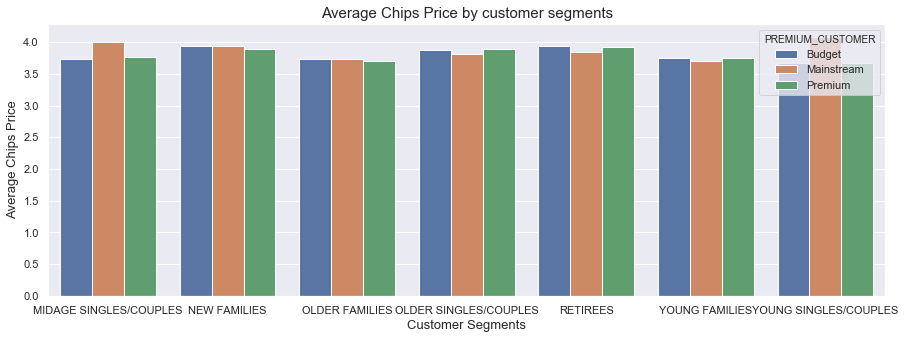

,LIFESTAGE,PREMIUM_CUSTOMER,Avg_Chips_Price
0,MIDAGE SINGLES/COUPLES,Budget,3.739975
1,MIDAGE SINGLES/COUPLES,Mainstream,4.000346
2,MIDAGE SINGLES/COUPLES,Premium,3.763535
3,NEW FAMILIES,Budget,3.936178
4,NEW FAMILIES,Mainstream,3.939315
5,NEW FAMILIES,Premium,3.886067
6,OLDER FAMILIES,Budget,3.736009
7,OLDER FAMILIES,Mainstream,3.726962
8,OLDER FAMILIES,Premium,3.704855
9,OLDER SINGLES/COUPLES,Budget,3.883299


In [34]:
plt.figure(figsize=(15,5))

segements = df.groupby(["LIFESTAGE","PREMIUM_CUSTOMER"]).agg({"TOT_SALES":"sum","PROD_QTY":"sum"}).reset_index()
segements["Avg_Chips_Price"] = segements["TOT_SALES"]/segements["PROD_QTY"]
sns.barplot(data=segements,x="LIFESTAGE",y="Avg_Chips_Price",hue="PREMIUM_CUSTOMER")

plt.xlabel("Customer Segments",size=13)
plt.ylabel("Average Chips Price",size=13)
plt.title("Average Chips Price by customer segments",size=15)

plt.show()

segements[["LIFESTAGE","PREMIUM_CUSTOMER","Avg_Chips_Price"]]

### Insights:

- **Top 3** customer segments with respect to Average Chips price are:
    1. (Mainstream) Young Singles/Couples 
    2. (Mainstream) Midage Singles/Couples
    3. (Mainstream) New Familie/'s
    
    
- (Budget and Premium) Young Singles/Couples have **least** Average Chips price.

## Overall Insights:

1. We observed (from plot 1) *Sales* are coming mainly from
    - (Budget) Older Families
    - (Mainstream) Young Singles/Couples
    - (Mainstream) Retirees 
    
**This could be because of high number of customers in these segments.** Let's check

2. Then (from plot 2) *Number of customers* per segment, we observed
    - There are more customers in `(Mainstream) Young Singles/Couples` and `(Mainstream) Retirees`. *This is the genuine reason why they contribute more to sales*
    - However, this was **not** in case of `(Budget) Older Families`

**Higher sales could also be due to more number of chips were bought per customer.** Let's check

3. Then (from plot 3) *Number of chips bought per customer*, we observed
    - `(All) Old Families` in general buy more chips per customer.*This is the reason why (Budget) Old Families contributes most to the sales*
    - Also, `(All) Young Familes` in general buy more chips per customer after Older Families.
    - *This also conclude that Families (except New Families) tends to buy more chips per customer than other segments because of more number of family members.*
    
**Let's also investigate the average price per unit chips bought for each customer segment as this is also a driver of total sales.**

4. (From plot 4) we observed that, `(Mainstream) Midage and Young Single/Couples` are willing to pay *more* per packet of chips compared to their budget and premium counterparts.

This may be due to premium customers being more likely to buy healthy snacks and when they buy chips, this is mainly for entertainment purposes rather than their own consumption.

We can validate this (from plot 2 & 3), as there being fewer `(Premium) Midage and Young Singles/Couples` buying chips compared to their mainstream counterparts.

**As the difference in average price per unit isn't large, we can check if this difference is statistically different.**

## Hypothesis Testing

*Let's define a function to perform t-test which can be reused*

In [35]:
def TwoSample_t_test(group1,group2,alpha=0.05,sign="Not Equal",summary=False):
    """
    This is Two Sample t-test (Unpaired)
    Variance of two groups set as not equal
    
    Parameters:
        group1 (int or float array): First array
        group2 (int or float array): Second array
        alpha (float): Alpha level is the probability of rejecting the null hypothesis when the null hypothesis is true.
        sign (string): (default=Not Equal) It is the sign of Alternate Hypothesis, Group 1 [sign] Group 2. It takes 3 value "Not Equal", "Greater", and "Less"
        summary (bool): (default=False) If True, it will print short summary.
    
    Returns: None
    """
    
    from scipy import stats
    tval, pval = stats.ttest_ind(group1,group2,equal_var=False)
    
    if sign == "Not Equal":
        print("NULL Hypothesis: Mean of Group 1 equal to Group 2")
        print("ALTERNATE Hypothesis: Mean of Group 1 NOT equal to Group 2\n")
        if pval <= alpha:
            print("Reject the Null Hypothesis")
        else:
            print("Fail to reject the Null Hypothesis")
        
    elif sign == "Greater":
        print("NULL Hypothesis: Mean of Group 1 is Less than or equal to Group 2")
        print("ALTERNATE Hypothesis: Mean of Group 1 is Greater than Group 2\n")
        pval/=2
        if (tval > 0) & (pval <= alpha):
            print("Reject the Null Hypothesis")
        else:
            print("Fail to reject the Null Hypothesis")
            
    elif sign == "Less":
        print("NULL Hypothesis: Mean of Group 1 is Greater than or equal to Group 2")
        print("ALTERNATE Hypothesis: Mean of Group 1 is Less than Group 2\n")
        pval/=2
        if (tval < 0) & (pval <= alpha):
            print("Reject the Null Hypothesis")
        else:
            print("Fail to reject the Null Hypothesis")
    
    else:
        print("[ERROR]: Incorrect sign")
        summary=False
    
    if summary == True:
        print("\n          Summary               \n------------------------------")
        print("tval: {}\npval: {}\nDegrees of Freedom: {}".format(tval,pval,(len(group1)+len(group2)-1)))

Now we will perform a hypothesis testing using two sample t-test to check if the difference is significant or not?

**Null Hypothesis:** Average price per unit for `(Mainstream) Midage and Young Single/Couples` is **less than or equal to** average price per packet of chips compared to their budget and premium counterparts

**Alternate Hypothesis:** Average price per unit for `(Mainstream) Midage and Young Single/Couples` is **greater** average price per packet of chips compared to their budget and premium counterparts

In [36]:
#copying whole data into a new data frame and creating a new feature pricePerUnit
data = df.copy()

data["pricePerUnit"] = data["TOT_SALES"]/data["PROD_QTY"]

data.head(2)

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PROD_WT,BRAND_NAME,Flavour,LIFESTAGE,PREMIUM_CUSTOMER,pricePerUnit
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,175,Naturals,Sea Salt,YOUNG SINGLES/COUPLES,Premium,3.0
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,175,Corn Chips,Nacho Cheese,MIDAGE SINGLES/COUPLES,Budget,2.1


In [37]:
#slicing the data of (Mainstream) Midage and Young Single/Couples
mainstream = data[(data["LIFESTAGE"].isin(["YOUNG SINGLES/COUPLES","MIDAGE SINGLES/COUPLES"])) & \
              (data["PREMIUM_CUSTOMER"].isin(["Mainstream"]))]["pricePerUnit"]

In [38]:
# slicing the data of (Budget and Premium) Midage and Young Single/Couples
others = data[(data["LIFESTAGE"].isin(["YOUNG SINGLES/COUPLES","MIDAGE SINGLES/COUPLES"])) & \
              ~(data["PREMIUM_CUSTOMER"].isin(["Mainstream"]))]["pricePerUnit"]

In [39]:
#using function to test the hypothesis
TwoSample_t_test(mainstream,others,alpha=0.05,sign="Greater",summary=True)

NULL Hypothesis: Mean of Group 1 is Less than or equal to Group 2
ALTERNATE Hypothesis: Mean of Group 1 is Greater than Group 2

Reject the Null Hypothesis

          Summary               
------------------------------
tval: 40.60989476220127
pval: 0.0
Degrees of Freedom: 61486


***It shows that difference in the average price per chips for `(Mainstream) Midage and Young Single/Couples` is significantly greater than their budget and premium counterparts.***

> # Phase 3: Insights and How to Target Segments

We have found quite a few interesting insights that we can dive deeper into.

We might want to target customer segments that contribute the most to sales to retain them or further increase sales. **Let's find out the target chips for our top 3 customer segments.**

*Let's define a function which we can reuse.*

In [40]:
def Cust_Segment_Insights(data,lifestage,premium,by):
    """
    It returns a dataframe which can be used to analyse purchasing behaviour of target segment v/s other segments
    
    Parameters:
                data (pandas dataframe): It takes the dataframe from which data for target and other segments will be taken out
                lifestagetage (string): It takes the name of the lifstage segment (for the target segment)
                premium (string): It takes the name of the premium segment (for the target segment)
                by (string): It takes the name of the feature by which we need analyse the data e.g. brand name, pack size, etc.
    Returns:
                It return a data frame with proportion of quantites purchased within the segments (target and others) and
                affinity score, which is the ratio of target to others
    """
    
    #target segment will be the data of given lifestage and premium segement
    target = data[(data["LIFESTAGE"] == lifestage) & (data["PREMIUM_CUSTOMER"] == premium)]
    
    #other segment will be the data other than given lifestage and premium segement
    other = data[~((data["LIFESTAGE"] == lifestage) & (data["PREMIUM_CUSTOMER"] == premium))]
    
    #grouping data by tar and takig proportion on quantity purchased
    target_gp = target.groupby(by)["PROD_QTY"].sum()
    target_gp /= target_gp.sum()
    target_gp = target_gp.reset_index()
    target_gp.rename(columns={"PROD_QTY":"target"},inplace=True)
    
    #grouping data by tar and takig proportion on quantity purchased
    other_gp = other.groupby(by)["PROD_QTY"].sum()
    other_gp /= other_gp.sum()
    other_gp = other_gp.reset_index()
    other_gp.rename(columns={"PROD_QTY":"others"},inplace=True)
    
    df = target_gp.merge(other_gp,on=by)
    df["affinity_score"] = df["target"] / df["others"]
    
    return df.sort_values(by="affinity_score",ascending=False).reset_index(drop=True)

### 1.1 Let's find out which brand chips (Mainstream) Young Singles/Couples prefers to purchase more?

In [41]:
insights_brand = Cust_Segment_Insights(df,lifestage="YOUNG SINGLES/COUPLES",premium="Mainstream",by="BRAND_NAME")

insights_brand

,BRAND_NAME,target,others,affinity_score
0,Tyrrells,0.029587,0.023933,1.236235
1,Twisties,0.043306,0.035283,1.227401
2,Kettle,0.185649,0.154216,1.203823
3,Tostitos,0.042581,0.035377,1.203638
4,Old El Paso,0.041598,0.034753,1.196958
5,Pringles,0.111980,0.093743,1.194536
6,Doritos,0.122877,0.105277,1.167176
7,Cobs,0.041856,0.036375,1.150700
8,Infuzions,0.060649,0.053157,1.140947
9,Thins,0.056611,0.053084,1.066445


### Let's understand the table first

- BRAND_NAME shows the unique brand names
- Target column shows the proportion of quantity of chip purchased of a particular brand within the target segment
- Others column shows the proportion of quantity of chip purchased of a particular brand within the others segment i.e other than target segment
- Affinity Score tell the ratio of target to others i.e. how more/less likely target segement purchase chips of a particular brand than the rest of the population
- Table is sorted in the descending order by Affinity score

### Insights:
- (Mainstream) Young Singles/Couples are **24% more likely to purchase Tyrrells chips** than the rest of the population

- (Mainstream) Young Singles/Couples are **53% less likely to purchase Burger Rings chips** than the rest of the population

### 1.2 Let's find out which pack size (Mainstream) Young Singles/Couples prefers to purchase more? 

In [42]:
insights_pack_size = Cust_Segment_Insights(df,lifestage="YOUNG SINGLES/COUPLES",premium="Mainstream",by="PROD_WT")

insights_pack_size

,PROD_WT,target,others,affinity_score
0,270,0.029846,0.023377,1.276694
1,380,0.030156,0.023832,1.265361
2,330,0.057465,0.046727,1.229814
3,134,0.111980,0.093743,1.194536
4,110,0.099658,0.083642,1.191482
5,210,0.027309,0.023401,1.167002
6,135,0.013849,0.012180,1.136997
7,250,0.013460,0.011905,1.130611
8,170,0.075740,0.075440,1.003980
9,300,0.054954,0.057263,0.959679


### Let's understand the table first

- PROD_WT shows the unique pack sizes
- Target column shows the proportion of quantity of chips purchased of a particular pack size within the target segment
- Others column shows the proportion of quantity of chips purchased of a particular pack size within the others segment i.e other than target segment
- Affinity Score tells the ratio of target to others i.e. how more/less likely target segement purchase chips of a particular pack size than the rest of the population
- Table is sorted in the descending order by Affinity score

### Insights:
- (Mainstream) Young Singles/Couples are **28% more likely to purchase 270 grams pack** than the rest of the population

- (Mainstream) Young Singles/Couples are **55% less likely to purchase 220 grams pack** than the rest of the population

In [43]:
df[df["PROD_WT"]==270]["PROD_NAME"].unique()

array(['Twisties Cheese     270g', 'Twisties Chicken270g'], dtype=object)

- **Twisties** is the only brand selling 270 grams pack
- It is the **2nd most favourable brand** they prefer to purchase from than the rest of the population
- (Mainstream) Young Singles/Couples are **23% more likely to purchase Twisties chips** than the rest of the population.

### *Therefore, Twisties chips of pack size 270 grams should be the target for (Mainstream) Young Singles/Couples, as they are more likely to purchase them than others.*

### 2.1 Let's find out which brand (Budget) Old Families prefers to purchase more?

In [44]:
insights_brand = Cust_Segment_Insights(df,lifestage="OLDER FAMILIES",premium="Budget",by="BRAND_NAME")

insights_brand

,BRAND_NAME,target,others,affinity_score
0,Red Rock Deli,0.079973,0.065357,1.223636
1,French Fries,0.006124,0.005149,1.189343
2,Woolworths,0.064174,0.054310,1.181627
3,Sunbites,0.013092,0.011100,1.179527
4,Corn Chips,0.019572,0.016810,1.164271
5,Naturals,0.031976,0.027553,1.160527
6,Burger Rings,0.006679,0.005806,1.150308
7,Smiths,0.133119,0.118218,1.126045
8,Cheetos,0.012160,0.010838,1.121949
9,Cheezels,0.018684,0.017198,1.086442


### Insights:
- (Budget) Old Families are **22% more likely to purchase Red Rock Deli chips** than the rest of the population

- (Budget) Old Families are **17% less likely to purchase Tostitos chips** than the rest of the population

### 2.2 Let's find out which pack size (Budget) Old Families prefers to purchase more?

In [45]:
insights_pack_size = Cust_Segment_Insights(df,lifestage="OLDER FAMILIES",premium="Budget",by="PROD_WT")

insights_pack_size

,PROD_WT,target,others,affinity_score
0,180,0.007123,0.005315,1.340226
1,125,0.006635,0.005289,1.254535
2,190,0.013425,0.011026,1.217629
3,160,0.013181,0.010899,1.209331
4,90,0.013092,0.011100,1.179527
5,200,0.019150,0.016451,1.164047
6,220,0.006679,0.005806,1.150308
7,70,0.006124,0.005611,1.091576
8,150,0.167469,0.162353,1.031513
9,300,0.058582,0.056940,1.028838


### Insights:
- (Budget) Old Families are **34% more likely to purchase 180 grams pack** than the rest of the population

- (Budget) Old Families are **11% less likely to 134 grams pack** than the rest of the population

In [46]:
df[df["PROD_WT"]==190]["PROD_NAME"].unique()

array(['Woolworths Cheese   Rings 190g', 'Cheetos Chs & Bacon Balls 190g'],
      dtype=object)

In [47]:
df[df["BRAND_NAME"]=="Woolworths"]["PROD_WT"].unique()

array([160, 200, 175, 300, 190], dtype=int64)

- (Budget) Old Families are **22% more likely to purchase 190 grams pack** than the rest of the population
- Woolworths sells 190 grams pack and it is the **3rd most favourable brand chips** (Mainstream) Retirees prefer to purchase than the rest of the population
- They are **18% more likely to purchase Woolworths chips** than the rest of the population

### *Therefore, Woolworths chips of pack size 190 grams should be the target for (Budget) Old Families, as they are more likely to purchase them than others.*

### 3.1 Let's find out which brand (Mainstream) Retirees prefers to purchase more?

In [48]:
insights_brand = Cust_Segment_Insights(df,lifestage="RETIREES",premium="Mainstream",by="BRAND_NAME")

insights_brand

,BRAND_NAME,target,others,affinity_score
0,Grain Waves,0.031048,0.029013,1.070139
1,Thins,0.056247,0.053101,1.059230
2,Twisties,0.037415,0.035764,1.046168
3,Pringles,0.098598,0.094837,1.039657
4,Infuzions,0.055432,0.053582,1.034533
5,Cheezels,0.017770,0.017292,1.027642
6,Old El Paso,0.036132,0.035202,1.026420
7,Doritos,0.108668,0.106446,1.020869
8,Kettle,0.158646,0.156446,1.014062
9,Cobs,0.036724,0.036800,0.997933


### Insights:
- (Mainstream) Retirees are **7% more likely to purchase Grain Waves chips** than the rest of the population

- (Budget) Old Families are **18% less likely to purchase French Fries chips** than the rest of the population

### 3.2 Let's find out which pack size (Mainstream) Retirees prefers to purchase more?

In [49]:
insights_pack_size = Cust_Segment_Insights(df,lifestage="RETIREES",premium="Mainstream",by="PROD_WT")

insights_pack_size

,PROD_WT,target,others,affinity_score
0,250,0.013525,0.011893,1.137170
1,70,0.006145,0.005614,1.094681
2,210,0.025396,0.023552,1.078298
3,300,0.059332,0.056891,1.042906
4,134,0.098598,0.094837,1.039657
5,180,0.005652,0.005461,1.034952
6,125,0.005553,0.005396,1.029053
7,110,0.086011,0.084768,1.014661
8,170,0.076262,0.075393,1.011528
9,150,0.163680,0.162734,1.005817


### Insights:
- (Mainstream) Retirees are **14% more likely to purchase 250 grams pack** than the rest of the population

- (Mainstream) Retirees are **13% less likely to 190 grams pack** than the rest of the population

In [50]:
df[df["PROD_WT"]==250]["PROD_NAME"].unique()

array(['Twisties Cheese     Burger 250g'], dtype=object)

- **Twisties** is the only brand selling 250 grams pack
- It is the **3rd most favourable brand chips** they prefer to purchase than the rest of the population
- (Mainstream) Retirees are **5% more likely to purchase Twisties chips** than the rest of the population

### *Therefore, Twisties chips of pack size 250 grams should be the target for (Mainstream) Retirees, as they are more likely to purchase them than others.*

----
# Conclusion

*Let us now summarize the whole process and conclude some final insights.*

- **Top 3** customer segments in terms of contributing most to the *sales* are:
    1. (Budget) Older Families
    2. (Mainstream) Young Singles/Couples
    3. (Mainstream) Retirees


- We found that, reason for **more sales** in (Mainstream) Young Singles/Couples and (Mainstream) Retirees is due to **high number of customers**


- While the reason for **more sales** in (Budget) Older Families is due to **high number of chips purchased per customer**


- We also found that, (Mainstream) Midage and Young Singles/Couples are willing to pay **more price per packet of chips**

    
### Targeting Segments

- **Woolworths chips of pack size 190 grams** should be the target product for *(Budget) Old Families*
    - As they are 18% more likely to purchase from this brand and 22% more likely to purchase 190 grams packs than the rest of the population
    
    
    
- **Twisties chips of pack size 270 grams** should be the target product for *(Mainstream) Young Singles/Couples*
    - As they are 23% more likely to purchase from this brand and 28% more likely to purchase 270 grams packs than the rest of the population
    
    
    
- **Twisties chips of pack size 250 grams** should be the target product for *(Mainstream) Retirees*
    - As they are 5% more likely to purchase from this brand and 14% more likely to purchase 250 grams packs than the rest of the population
    
    
#### Closing Statement
*Now the Category Manager can make startegies and communicate with the store managers where these customers are more likely to visit and increase the visibility of these products in order to increase the sales in an effective manner.*

**Task 1 of Quantium Virtual Internship Program ends here.**